In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../extract_pin_addr")
from JicBitstream import JicBitstream, JicBitstreamZip

%matplotlib notebook

In [2]:
pcie_parameter_files = {
    "vendor_id": [
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-1_0_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-2_0_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-65534_0_0_0_0_2_10_0_0.zip",
    ],
    "device_id": [
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_1_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_2_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_65534_0_0_0_2_10_0_0.zip",
    ],
    "class_code": [
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_1_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_2_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_65534_0_0_2_10_0_0.zip",
    ],
    "subsystem_device_id": [
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_65534_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_1_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_2_0_2_10_0_0.zip",
    ],
    "subsystem_vendor_id": [
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_1_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_2_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_65534_2_10_0_0.zip",
    ],
    "bar0_size_mask": [
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_20_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_21_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_28_0_0.zip",
    ],
    "bar2_size_mask": [
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_2_15.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_2_16.zip",
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_2_28.zip",
    ],
}

In [3]:
PCIE_PARAMETER_LOCS = {}

In [4]:
def compare(fn0, fn1, path="../../results/pcie/"):
    fn0 = os.path.join(path, fn0)
    fn1 = os.path.join(path, fn1)
    jic0 = JicBitstreamZip(fn0)
    jic1 = JicBitstreamZip(fn1)
    diff = jic0.diff_pos(jic1)

    return diff

def get_all_changes(jics):
    diff_lst = []

    for f2 in jics[1:]:
        diff_lst.append(compare(jics[0], f2))

    diff_lst_comb = list()

    # trim the begining (header) and the end (checksums)
    LIM_LOW = 10000
    MAX = np.max(
        [(lambda el: 0 if len(el) == 0 else np.max(el))(el[0]) for el in diff_lst]
    )
    LIM_HIGH = MAX - 10000

    for diff in diff_lst:
        for el in diff[0]:
            if LIM_LOW < el < LIM_HIGH:
                diff_lst_comb.append(el)

    diff_lst_comb = np.array(sorted(list(set(diff_lst_comb))))
    
    return diff_lst_comb

def split_data_checksum(addrs):
    return addrs[addrs < np.mean(addrs)]

for param, jics in pcie_parameter_files.items():
    addrs = get_all_changes(jics)
    print(addrs)
    addrs = split_data_checksum(addrs)
    print(addrs, len(addrs))
    PCIE_PARAMETER_LOCS[param] = addrs[0:16]

[948937 948969 949001 949033 949065 949097 949129 949161 949193 949225
 949257 949289 949321 949353 949385 949417 956256 956257 956258 956259
 956260 956261 956262 956264 956265 956266 956267 956268 956269 956270
 956271]
[948937 948969 949001 949033 949065 949097 949129 949161 949193 949225
 949257 949289 949321 949353 949385 949417] 16
[948425 948457 948489 948521 948553 948585 948617 948649 948681 948713
 948745 948777 948809 948841 948873 948905 956256 956257 956258 956259
 956260 956261 956262 956263 956265 956266 956267 956268 956270 956271]
[948425 948457 948489 948521 948553 948585 948617 948649 948681 948713
 948745 948777 948809 948841 948873 948905] 16
[947657 947689 947721 947753 947785 947817 947849 947881 947913 947945
 947977 948009 948041 948073 948105 948137 956256 956257 956258 956259
 956260 956261 956263 956264 956265 956266 956267 956268 956269 956270
 956271]
[947657 947689 947721 947753 947785 947817 947849 947881 947913 947945
 947977 948009 948041 948073 948105

In [5]:
PCIE_PARAMETER_LOCS

{'vendor_id': array([948937, 948969, 949001, 949033, 949065, 949097, 949129, 949161,
        949193, 949225, 949257, 949289, 949321, 949353, 949385, 949417]),
 'device_id': array([948425, 948457, 948489, 948521, 948553, 948585, 948617, 948649,
        948681, 948713, 948745, 948777, 948809, 948841, 948873, 948905]),
 'class_code': array([947657, 947689, 947721, 947753, 947785, 947817, 947849, 947881,
        947913, 947945, 947977, 948009, 948041, 948073, 948105, 948137]),
 'subsystem_device_id': array([946313, 946345, 946377, 946409, 946441, 946473, 946505, 946537,
        946569, 946601, 946633, 946665, 946697, 946729, 946752, 946753]),
 'subsystem_vendor_id': array([946889, 946921, 946953, 946985, 947017, 947049, 947081, 947113,
        947145, 947177, 947209, 947241, 947273, 947305, 947337, 947369]),
 'bar0_size_mask': array([936137, 936169, 936201, 936233, 936265, 936297, 936329, 936361,
        936393, 936425, 936457, 936489, 936521, 936553, 936585, 936617]),
 'bar2_size_mask': a

<IPython.core.display.Javascript object>


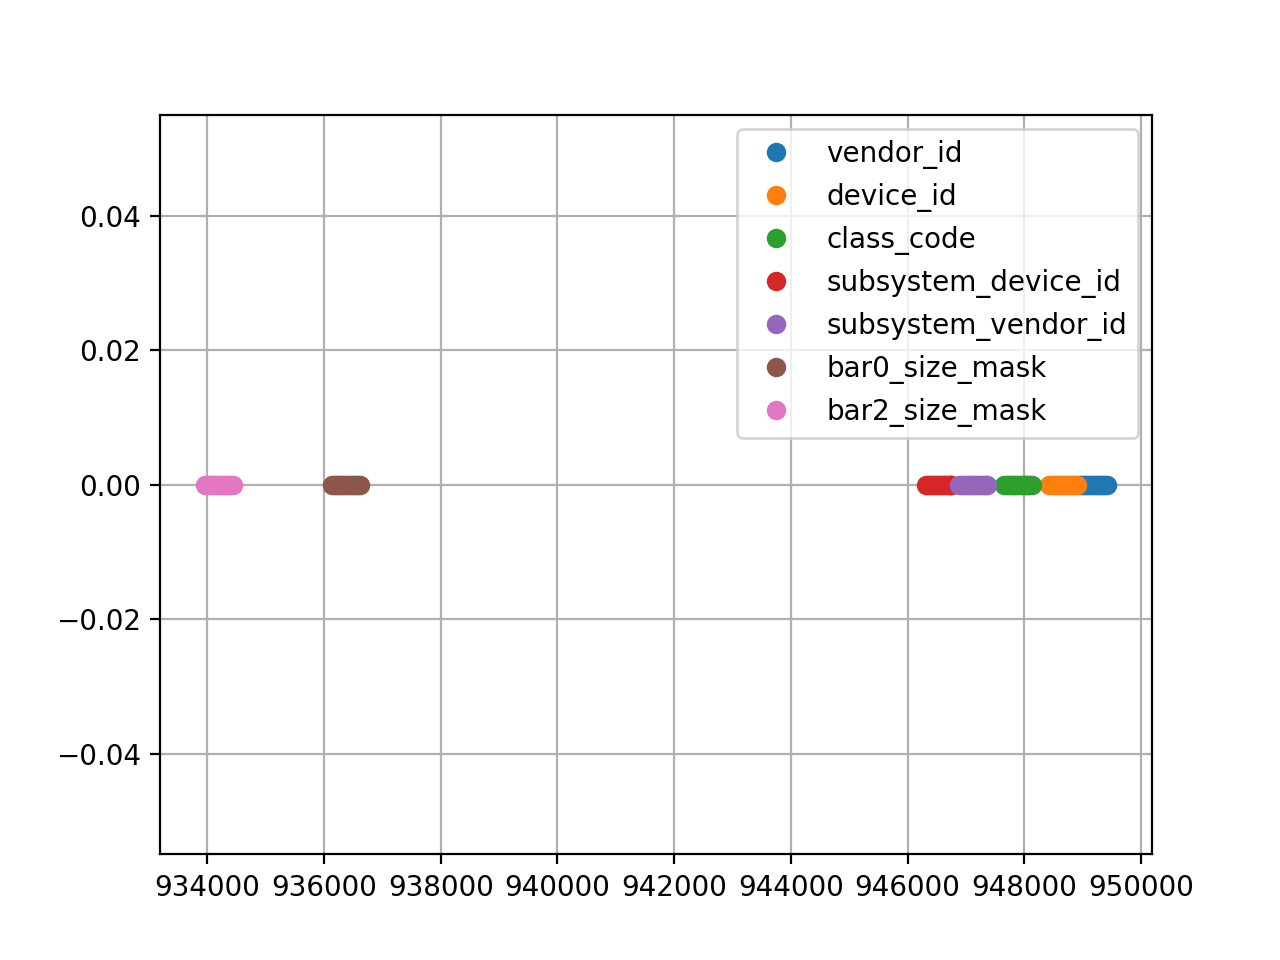

In [7]:
fig, ax = plt.subplots()

for idx, param in enumerate(PCIE_PARAMETER_LOCS):
    ax.plot(PCIE_PARAMETER_LOCS[param], np.zeros(16), 'o', label=param)
    
ax.legend()
ax.grid(True)